In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
car=pd.read_csv("/Users/xinjianlu/Downloads/Automobile_data.csv")

In [3]:
car.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154.0,5000.0,19,26,16500.0


In [4]:
car.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [5]:
import seaborn as sns

# Data Exploration

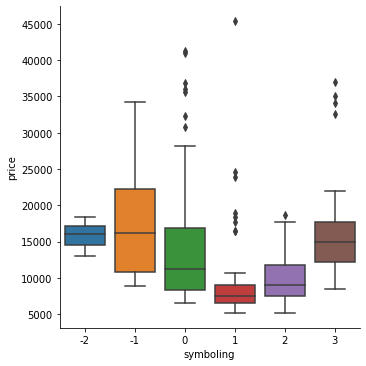

In [6]:
sns.catplot(x="symboling", y="price", data=car,kind="box")

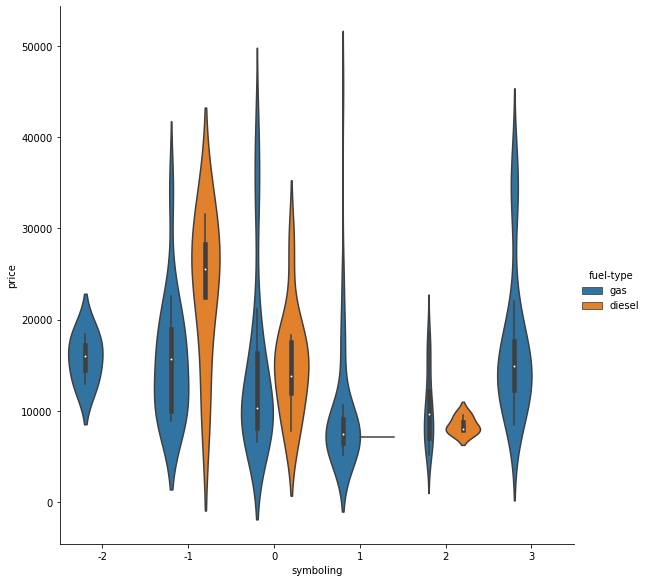

In [7]:
sns.catplot(x="symboling", y="price", data=car,kind="violin",hue="fuel-type",height=8)

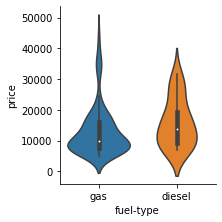

In [8]:
sns.catplot(x="fuel-type", y="price", data=car,kind="violin",height=3)

In [9]:
#sns.catplot(x="num-of-doors", y="price", data=car,kind="violin")

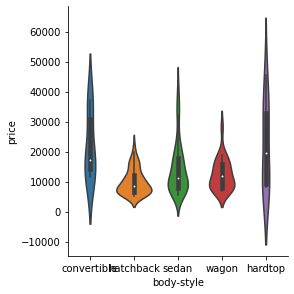

In [10]:
sns.catplot(x="body-style", y="price", data=car,kind="violin",height=4)

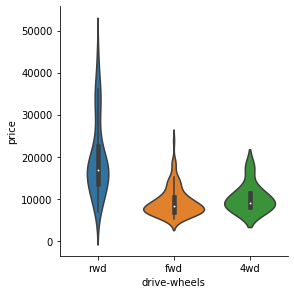

In [11]:
sns.catplot(x="drive-wheels", y="price", data=car,kind="violin",height=4)

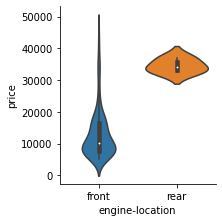

In [12]:
sns.catplot(x="engine-location", y="price", data=car,kind="violin",height=3)

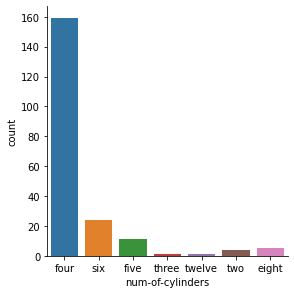

In [13]:
sns.catplot(x="num-of-cylinders", data=car,kind="count",height=4)

<AxesSubplot:>

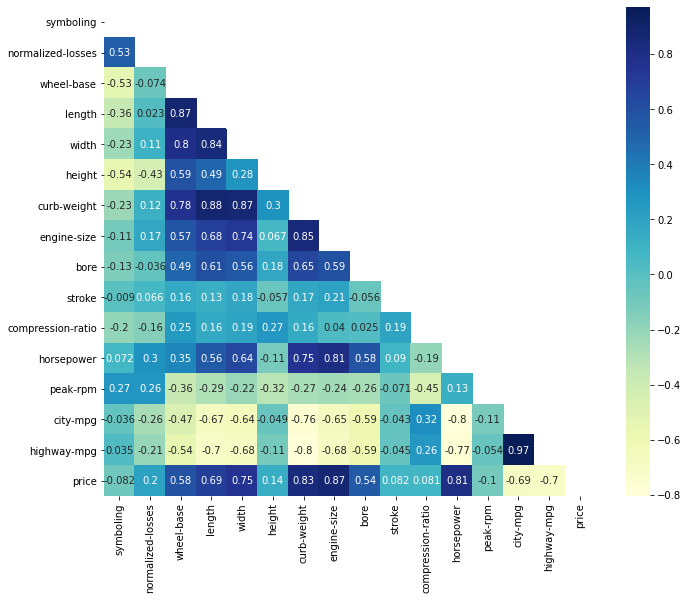

In [14]:
import matplotlib.pyplot as plt
mask=np.zeros_like(car.corr())
mask[np.triu_indices_from(mask)]=True
f,ax=plt.subplots(figsize=(11,9))
sns.heatmap(car.corr(),mask=mask,cmap="YlGnBu",ax=ax,annot=True)

### we observe that curb-weight has strong relationship with length, weight, height, engine-size and horse-power, so we remove it; engine size has strong correlation with horse power so we remove any of them; city-mpg and highway-mpg are also highly correlated so we remove one of them, stroke, compression-ratio and peak-rpm has  low correlation with price so we remove them as well

# Feature Engineering

In [15]:
car["volume"]=car["length"]*car["width"]*car["height"]

In [16]:
numerical=["symboling","normalized-losses","volume","horsepower","bore","city-mpg"]

In [17]:
car["normalized-losses"]=car.groupby(by="symboling")["normalized-losses"].transform(lambda x:x.fillna(x.mean()))

In [18]:
car.dropna(how="any",inplace=True)

#### 似乎cross_val_score不会对数据进行随机化，这在相似数据分组在一起时可能导致更糟的预测。我找到的最简单的解决方案（通过此答案）是在运行模型之前简单地对数据帧进行洗牌

In [19]:
shuffled_car = car.reindex(np.random.permutation(car.index))

In [20]:
shuffled_car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,volume
141,0,102.000000,subaru,gas,std,four,sedan,fwd,front,97.2,172.0,65.4,52.5,2145,ohcf,four,108,2bbl,3.62,2.64,10,82.0,4800.0,32,37,7126.0,590562.000
198,-2,103.000000,volvo,gas,turbo,four,sedan,rwd,front,104.3,188.8,67.2,56.2,3045,ohc,four,130,mpfi,3.62,3.15,8,162.0,5100.0,17,22,18420.0,713029.632
0,3,168.647059,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111.0,5000.0,21,27,13495.0,528019.904
52,1,104.000000,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1905,ohc,four,91,2bbl,3.03,3.15,9,68.0,5000.0,31,38,6795.0,552589.302
140,2,83.000000,subaru,gas,std,two,hatchback,4wd,front,93.3,157.3,63.8,55.7,2240,ohcf,four,108,2bbl,3.62,2.64,9,73.0,4400.0,26,31,7603.0,558990.718


In [21]:
X=shuffled_car.drop(["price"],axis=1)
y=shuffled_car["price"]

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X[numerical]=scaler.fit_transform(car[numerical])

In [23]:
X.drop(["wheel-base","length","width","height","curb-weight","engine-size"],axis=1,inplace=True)

In [24]:
X.drop(["stroke","compression-ratio","peak-rpm","highway-mpg"],axis=1,inplace=True)

In [25]:
X.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,horsepower,city-mpg,volume
141,1.0,0.542655,subaru,gas,std,four,sedan,fwd,front,ohcf,four,2bbl,0.664286,0.294393,0.222222,0.191621
198,1.0,0.542655,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,0.664286,0.294393,0.222222,0.191621
0,0.6,0.332851,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,0.100000,0.495327,0.166667,0.343065
52,0.8,0.518325,mazda,gas,std,two,hatchback,fwd,front,ohc,four,2bbl,0.464286,0.252336,0.305556,0.463117
140,0.8,0.518325,subaru,gas,std,two,hatchback,4wd,front,ohcf,four,2bbl,0.464286,0.313084,0.138889,0.467993


In [26]:
categorical=["make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location",
             "num-of-cylinders","engine-type","fuel-system"]

In [27]:
dummies=pd.get_dummies(X[categorical])
X=X.join(dummies).drop(categorical,axis=1)

# Modeling

### Linear Regression

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [29]:
lr=LinearRegression()
print("the R^2 score for linear regression is {:.3}".format(cross_val_score(lr, X, y, cv=5,scoring="r2").mean()))

the R^2 score for linear regression is -4.98e+20


In [30]:
cross_val_score(lr, X, y, cv=5)

array([ 7.70420580e-01, -5.82333269e+17, -3.20720973e+19, -2.45798262e+21,
        8.60351510e-01])

### Lasso Regression (L1 Regularization)

In [31]:
from sklearn import linear_model
lasso=linear_model.Lasso(random_state=123)

In [32]:
cross_val_score(lasso, X, y, cv=5).mean()

0.8373658835782491

In [33]:
from sklearn.model_selection import GridSearchCV
params={"alpha":[10,50,100,200,300]}
g=GridSearchCV(lasso, param_grid=params).fit(X,y)

In [34]:
print(g.best_score_)
print(g.best_params_)

0.8493712469826844
{'alpha': 10}


In [35]:
params1={"alpha":range(10,50)}
g1=GridSearchCV(lasso, param_grid=params1,scoring="r2").fit(X,y)
print(g1.best_score_)
print(g1.best_params_)

0.8496971355192644
{'alpha': 12}


In [36]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5).fit(X,y)
print(lassocv.score(X,y))
print(lassocv.alpha_)

0.9233777408960107
5.794657165222228


In [37]:
cross_val_score(linear_model.Lasso(alpha=12,random_state=123), X, y, cv=5).mean()

0.8496971355192644

In [38]:
#cross_val_score(linear_model.Lasso(alpha=lassocv.alpha_,random_state=123), X, y, cv=5).mean()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
best_lasso=linear_model.Lasso(alpha=12,random_state=123).fit(X_train,y_train)
y_pred=best_lasso.predict(X_test)
r2_lasso=r2_score(y_test,y_pred)
print(r2_lasso)

0.8331797571370935


In [41]:
lasso_coefs=pd.Series(best_lasso.coef_ ,index=X.columns)
significant_lasso_coefs=pd.concat([lasso_coefs.sort_values().head(10),lasso_coefs.sort_values().tail(10)])

<AxesSubplot:>

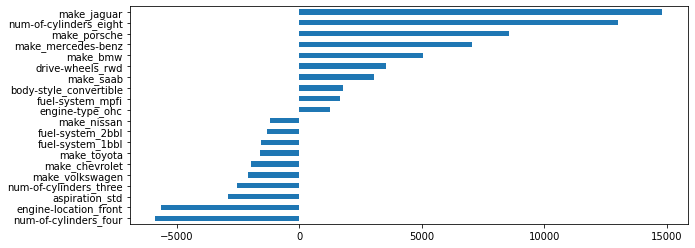

In [42]:
plt.figure(figsize=(10,4))
significant_lasso_coefs.plot(kind="barh")

### Random Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100,random_state=123)

In [44]:
cross_val_score(forest, X, y, cv=5)

array([0.7706288 , 0.78788708, 0.74454659, 0.53042088, 0.67747416])

In [45]:
params2={"max_depth":range(3,11),"min_samples_split":range(2,20,1)}
g2=GridSearchCV(forest, param_grid=params2,n_jobs=-1).fit(X,y)

In [46]:
print(g2.best_score_)
print(g2.best_params_)

0.7141774241464707
{'max_depth': 8, 'min_samples_split': 11}


In [47]:
g2.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_split=11, random_state=123)

In [48]:
best_tree=g2.best_estimator_.fit(X_train,y_train)
y_pred_tree=best_tree.predict(X_test)
r2_tree=r2_score(y_test,y_pred_tree)
print(r2_tree)

0.8268774101703691


In [49]:
tree_coefs=pd.Series(best_tree.feature_importances_,index=X.columns).sort_values()

<AxesSubplot:>

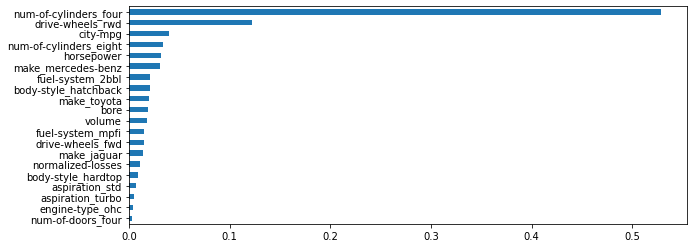

In [50]:
significant_tree_coefs=tree_coefs.tail(20)
plt.figure(figsize=(10,4))
significant_tree_coefs.plot(kind="barh")

# Take a glance of predicted value

In [51]:
d={"true":list(y_test),"lasso predicted":pd.Series(y_pred),"tree predicted":pd.Series(y_pred_tree)}
pd.DataFrame(d).head(5)

,true,lasso predicted,tree predicted
0,6692.0,7808.835169,8126.043569
1,9279.0,9889.141573,8669.831788
2,12170.0,14502.904326,11564.457665
3,8558.0,14084.096776,12204.919431
4,9233.0,7273.014980,8205.211453
